# Facets of Mathematics - Week 9
# Regression Modelling

### Aims

By the end of this notebook you 

* should be an expert in fitting regression functions using Ordinary Least Squares
* will have written a lot of code - so make sure you add many comments which you can do by either adding a '#' in front of a code line or by wrapping pieces of code as follows: `''' this will be commented out '''`. 
* can advice the Scottish government in a hypothetical ecology question

### Topics

* Computational considerations when using python
* Plotting functions and data points
* Polynomial models

### References

**Montgomery, Peck, and Vining:** D. C. Montgomery, E. A. Peck, and G. G. Vining, "Introduction to Linear Regression Analysis", 5th Edition, Wiley Series in Probability and Statistics, 2012

* Simple Linear Regression: Chapter 2, Sections 2.1 and 2.2
* Multiple Linear Regression: Chapter 3, Sections 3.1 and 3.2

**Davison:** A. C. Davison, "Statistical Models", Cambridge Series in Statistical and Probabilistic Mathematics, 2008

* Linear Regression: Chapter 8

---

## Example 1

This example is a higher dimensional example than the ones we encountered in the last workshop, and we will see that the predictors are now stored in a matrix rather than a vector. We run the setup file which loads the necessary packages for us.

In [1]:
%run setup2.py

#### Exercise
Load the data matrix using `np.load('rm2_ex1_x.npy')` and the vector with the dependent variables using `np.load('rm2_ex1_y.npy')`. Determine the dimensionality $d$ of the problem, and find the number of data points $n$.

In [2]:
# INSERT CODE
x = np.load('rm2_ex1_x.npy')
y = np.load('rm2_ex1_y.npy')

n = y.shape[0]
d = x.shape
print('Number of data points = ',n)
print('Dimensionality = ',d)

Number of data points =  20
Dimensionality =  (20, 5)


### Exercise

Calculate the estimate $\hat\beta_{OLS}$ for the simple linear model $y=\beta_0+\sum_{i=1}^d\beta_ix_i$ using ordinary least squares. 

Functions you might need are the matrix product of two matrices $A$ and $B$ `np.matmul(A,B)` and the dot product of $A$ and $B$ `np.dot(A,B)`. Can one replace `np.matmul` by `np.dot`? Another useful function is `np.linalg.inv(A)` to get the inverse of $A$. 

In [3]:
X = np.c_[np.ones(n),x[:,0],x[:,1],x[:,2],x[:,3],x[:,4]]
#(XTX)^−1 * XT * y
inv_XT_X = np.linalg.inv(np.dot(X.transpose(),X))
beta_hat = np.dot(inv_XT_X,np.dot(X.transpose(),y))

---
Let the inverse of $X^TX$ be given as `inv_XT_X` (this can be calculated e.g. by  `inv_XT_X = np.linalg.inv(np.dot(X.transpose(),X))`). Two ways of computing the OlS estimate are 
* `np.dot(inv_XT_X,np.dot(X.transpose(),y)`, and 
* `np.dot(np.dot(inv_XT_X,X.transpose()),y)`.


### Question 

What advantage has the first option over the second when computing $\hat\beta$?

In [93]:
# INSERT CODE if necessary
# the first is a matrix times a vector, then times a vector
# the second is a matrix times a matrix, then times a vector
# the first one has less muliplication
np.random.seed(0)
M = np.random.random_sample((50000,1000))
inv_MT_M = np.linalg.inv(np.dot(M.transpose(),M))


In [94]:
yM = np.random.random_sample(50000)
import time
from datetime import timedelta
start_time = time.monotonic()
np.dot(np.dot(inv_MT_M,M.transpose()),yM)
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))
from datetime import timedelta
start_time = time.monotonic()
np.dot(inv_MT_M,np.dot(M.transpose(),yM))
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))


0:00:01.313000
0:00:00.016000


### Exercise
Compute the fitted values, the residual sum of squares, and the RMSE.

In [5]:
# INSERT CODE
Y = np.dot(X, beta_hat)
RS = np.dot(Y-y,Y-y)
RMSE = np.sqrt(np.average((Y-y)*(Y-y)))
print(RS,RMSE,np.sqrt(RS/20),calc_RMSE(Y,y))

0.11809668732100576 0.07684292007758611 0.07684292007758611 0.07684292007758611


---

## Example 2

We will once more consider the situation where we are interested in estimating a function that is non-linear but can be estimated by a linear model. Below are observations of the independent variable `x` and dependent variable `y`.

In [16]:
x = np.array([
    0.0187898 , 0.0202184 , 0.06022547, 0.07103606, 0.0871293 , 0.11827443, 0.1289263 , 0.14335329, 0.21038256, 0.26455561,
    0.31542835, 0.3595079 , 0.36371077, 0.38344152, 0.41466194, 0.4236548 , 0.43703195, 0.43758721, 0.45615033, 0.46147936,
    0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456, 0.56843395, 0.60276338, 0.61209572, 0.616934  , 0.6176355 ,
    0.63992102, 0.64589411, 0.66676672, 0.67063787, 0.6818203 , 0.6976312 , 0.71518937, 0.77423369, 0.77815675, 0.78052918,
    0.79172504, 0.79915856, 0.83261985, 0.87001215, 0.891773  , 0.92559664, 0.94374808, 0.94466892, 0.96366276, 0.97861834
])

y = np.array([ 
    0.81850358,  1.1824961 ,  0.83923596,  0.80455289,  0.64957466,  0.67644428,  0.36828029,  0.40909561, -0.17100076, -0.44688282,
   -0.83847579, -1.0679183 , -0.96247568, -0.94872222, -0.98672531, -0.95254448, -1.02143317, -0.9930154 , -0.97156975, -0.92162695,
   -0.65729412, -0.70250735, -0.40175015, -0.43145416, -0.41137072, -0.19910907, -0.06902804,  0.10005129,  0.2055166 ,  0.15096471,
    0.42236707,  0.22921419,  0.54091452,  0.45828255,  0.51221126,  0.6359448 ,  0.75508157,  0.98520989,  0.86880526,  1.07841262,
    1.04445505,  0.84635379,  1.11618622,  1.04217923,  0.86916685,  0.53367541,  0.32049347,  0.52646495,  0.24121593,  0.28938747
])

n = len(x)

When we plot these data we see that there is clearly not a linear relationship between `x` and `y` but rather some kind of periodic or sinusoidal relationship.

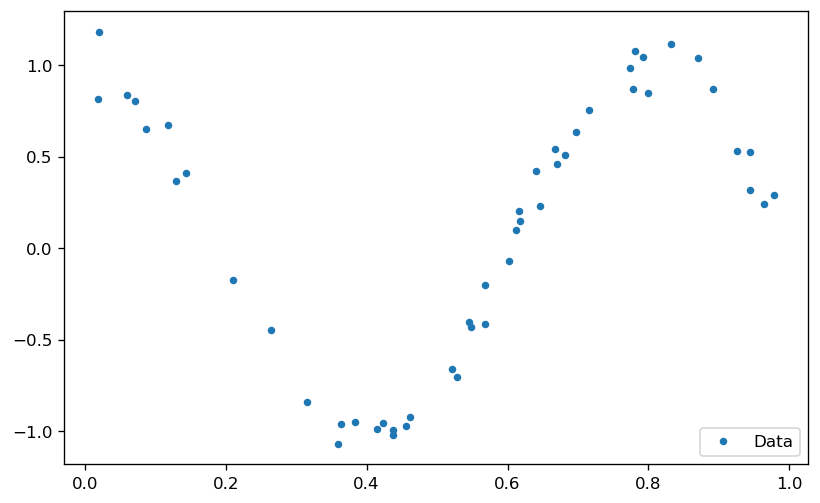

In [17]:
plt.plot(x, y, ".", label = "Data")
plt.legend(loc="lower right")
plt.show()

### Exercise
Fit a simple linear model and report the resulting $\hat\beta$ and the resulting fitted values $\hat y$. Store these as `beta_hat` and `y_hat` - we will use them again in other cells!

In [18]:
# Insert code here
X = X = np.c_[np.ones(n),x]
inv_XT_X = np.linalg.inv(np.dot(X.transpose(),X))

beta_hat = np.dot(inv_XT_X,np.dot(X.transpose(),y)) # this should be a 2-dimensional vector - we will use it in the following cells!
y_hat = np.dot(X,beta_hat) # these fitted values should be a n-dimensional vector - we will use them in the following cells!

When we plot the data and regression line we can see that this is a poor model with a relatively large RMSE.

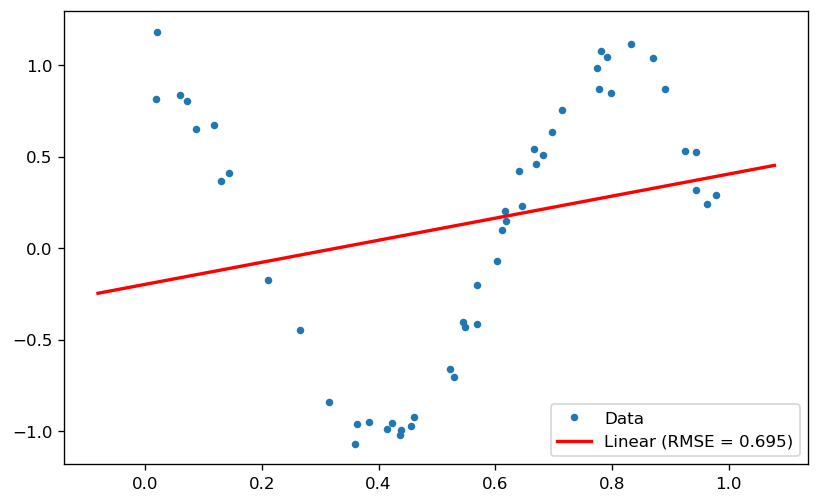

In [19]:
plt.plot(x, y, ".", label = "Data")
x_vals = np.linspace(x.min()-0.1,x.max()+0.1,21)
y_vals = beta_hat[0]+beta_hat[1]*x_vals
plt.plot(x_vals, y_vals, "r-", label = "Linear (RMSE = %.3f)" % calc_RMSE(y, y_hat))
plt.legend(loc="lower right")
plt.show()

### A Quadratic Model

As we discussed in the lectures, one of the interesting tricks we can play with linear regression is that we can easily fit any model as long as the regression equation is a *linear* function of the $\beta$s. What this means is that we can perform any transformation we would like on our predictor(s) (e.g. `x`) and still have a valid and solvable regression equation.

For non-linear patterns, one of the more straight forward transformations is to use a polynomial transformation of our predictor(s). So for example, a line does not do a good job describing our data, but maybe a parabola would be a better fit. In that case we can then consider a regression equation with the following structure,

$$ y_i = \beta_0 + \beta_1 x_i + \beta_2 {x_i}^2 $$

This equation is still linear in terms of $\beta$ and therefore can still be fit by our standard least squares mechanics. We construct out model matrix by simply including an additional column which is composed of the square of the elements of `x`.

$$ \boldsymbol{X} = \big[ \boldsymbol{1}, \boldsymbol{x}, \boldsymbol{x}^2 \big] $$

While in the last workshop we manually defined each column of the design matrix, we now use more advanced python techniques. The function `np.c_` creates our design matrix with the desired columns. 

### Exercise
Fit a quadratic model and save the resulting estimates for $\hat\beta$ and $\hat y$ as `beta_hat2` and `y_hat2`, respectively.

In [22]:
X2 = np.c_[np.ones(n), x, x**2]
inv_xt_x = np.linalg.inv(np.dot(X2.transpose(),X2))
beta_hat2 = np.dot(inv_xt_x,np.dot(X2.transpose(),y))
y_hat2 =np.dot(X2,beta_hat2)

As before we can then plot the results of this model fit along with the data and the linear fit to see how we've done. The quadratic model is a bit better both in apparent fit and RMSE but still does not do a great job describing the data.

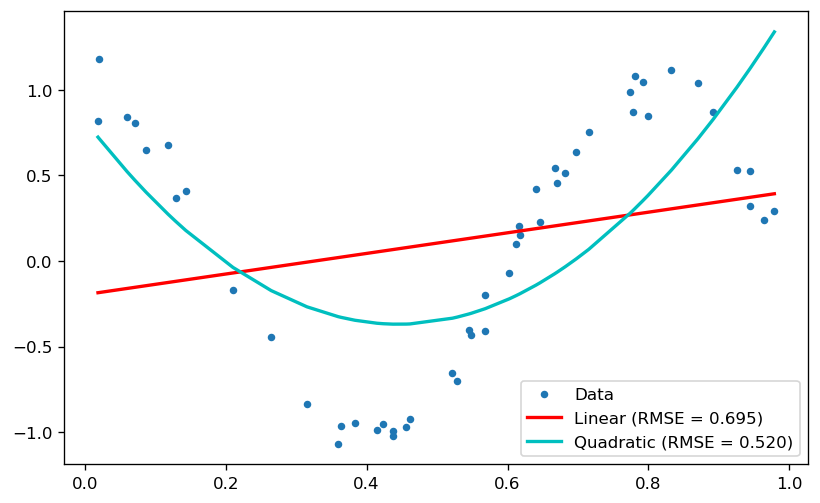

In [23]:
plt.plot(x, y, ".", label = "Data")
plt.plot(x, y_hat, "r-", label = "Linear (RMSE = %.3f)" % calc_RMSE(y, y_hat))
plt.plot(x, y_hat2, "c-", label = "Quadratic (RMSE = %.3f)" % calc_RMSE(y, y_hat2))
plt.legend()
plt.show()

Clearly, the quadratic model is more flexible than the linear model, but is not flexible enough for our data particularly well. 

---

Before moving on, we will now learn to use a Python package to help us with the regression. The function `LinearRegression` is loaded from the `sklearn.linear_model` package (this happens in the 'setup2.py' file which we ran at the beginning of this workshop). 

In the next cell, we firstly allow to call this function with no automatically fitted intercept (we fit the intercept manually) as `linear_reg`. We then produce the design matrix we want to use, fit the regression model, and calculate the fitted values, also known as predicted values. We check that they are the same as the ones calculated above.

In [24]:
linear_reg = sk_lm.LinearRegression(fit_intercept = False)

X = np.c_[np.ones(n), x]
reg = linear_reg.fit(X, y)

y_hat_sk = reg.predict(X)
print(y_hat-y_hat_sk)

X2 = np.c_[np.ones(n), x, x**2]
reg = linear_reg.fit(X2, y)

y_hat_sk2 = reg.predict(X2)
print(y_hat2-y_hat_sk2)

[ 3.33066907e-16  3.33066907e-16  3.05311332e-16  3.05311332e-16
  2.77555756e-16  2.77555756e-16  2.63677968e-16  2.49800181e-16
  2.22044605e-16  1.94289029e-16  1.38777878e-16  1.38777878e-16
  1.38777878e-16  1.11022302e-16  8.32667268e-17  1.11022302e-16
  5.55111512e-17  1.11022302e-16  5.55111512e-17  5.55111512e-17
  0.00000000e+00  5.55111512e-17  5.55111512e-17  5.55111512e-17
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.55111512e-17  0.00000000e+00
 -5.55111512e-17 -5.55111512e-17 -5.55111512e-17 -5.55111512e-17
 -5.55111512e-17 -5.55111512e-17 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -2.22044605e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -2.22044605e-16 -2.22044605e-16
 -1.11022302e-16 -2.22044605e-16]
[-2.32036612e-14 -2.32036612e-14 -1.83186799e-14 -1.71529457e-14
 -1.54321000e-14 -1.22679644e-14 -1.10744747e-14 -9.71445147e-15
 -4.05231404e-15 -2.77555756e-16  2.77555756e-15  4.6629

Note that the difference between the fitted values using the different methods is less than $10^{-14}$. This is due to numerical erros as the scikit method uses another numerical routine to calculate the OLS estimate.

---

## Higher order polynomials

Based on what we've just seen, it appears that we should be able to continue to increase the degree of the polynomial in our model to obtain a better fit to the data. Below we will define a function which will allow us to pick a degree for the polynomial model it will then fit and plot the results of that model. 

As with the previous examples we constructed by hand, this function creates a model matrix which includes $\boldsymbol{x}^0, \boldsymbol{x}^1, \ldots, \boldsymbol{x}^d$ and then uses that model matrix to solve for the model's $\boldsymbol{\beta}$s using sklearn's `LinearRegression` object. The model that is fit will have the form,

$$ \hat{y}_i = \sum_{j=0}^{d} \beta_j {x_i}^j = \beta_0 + \beta_1 x_i + \cdots + \beta_d {x_i}^d $$

where $d$ is determined by your choice of `degree`.

Note that whenever we consider a polynomial of order $d$ that we always include predictors for polynomial transformations of the predictors from degree $0$ to $d-1$ as well.

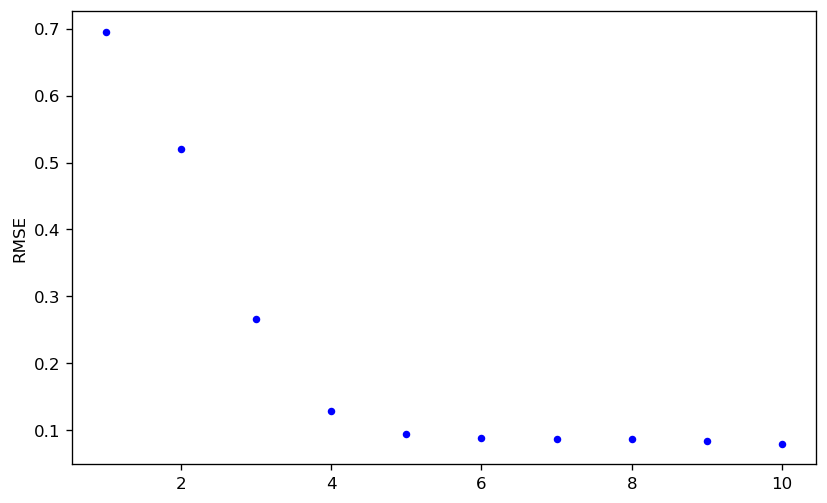

In [25]:
def poly_model_matrix(x, degree):
    return np.c_[ [x**i for i in range(0,degree+1)] ].T  # Python list comprehension to construct model matrix

def poly_rmse(x, y, degrees):
    rmse_out = []
    for degree in degrees:
        X = poly_model_matrix(x, degree)
        reg = linear_reg.fit(X, y)
        y_hat = reg.predict(X)
        rmse_out.extend([calc_RMSE(y, y_hat)])
    return rmse_out
    

degrees = range(1,11)
rmse = poly_rmse(x, y, degrees)

plt.plot(degrees, rmse, 'b.')
plt.ylabel('RMSE')
plt.show()

### Exercise 

Based on the plot of RMSE by degree of polynomial, choose two  polynomial models which may be a suitable fit to the data. 
* Enter the degree of these polynomials in the cell below. 
* Justify your answers. 
* Plot the corresponding regression lines.

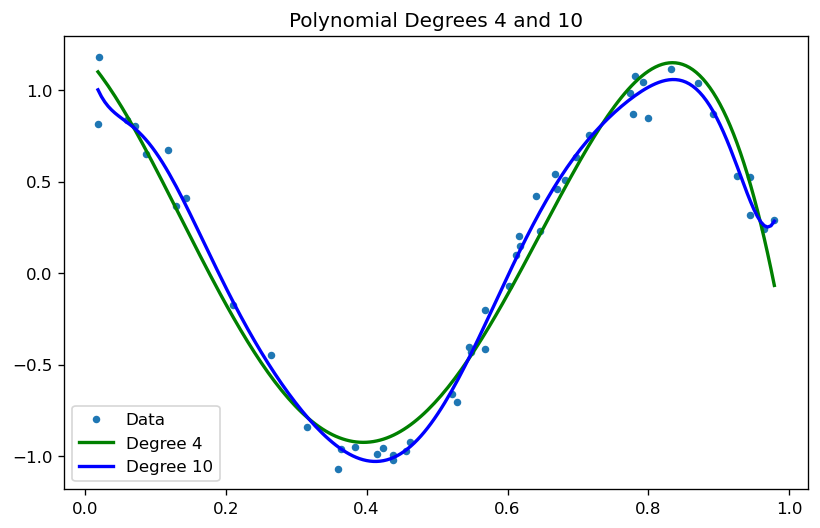

In [68]:
degree1 = 4 # Insert choice
degree2 = 10 # Insert choice

x_vals = np.linspace(min(x), max(x), num=200) # Construct prediction location data

def poly_pred(x, y, x_vals, degree):
    X_vals = poly_model_matrix(x_vals, degree)  # Construct model matrix for the prediction data 
    X = poly_model_matrix(x, degree)
    reg = linear_reg.fit(X, y)
    y_vals = reg.predict(X_vals)                # Calculate predictions using prediction data
    y_hat = reg.predict(X)
    return(y_vals, y_hat)
      
# Plot the data and regression line
plt.plot(x, y, ".", label="Data")    
plt.plot(x_vals, poly_pred(x, y, x_vals, degree1)[0], "g-", label="Degree %d" % (degree1))
plt.plot(x_vals, poly_pred(x, y, x_vals, degree2)[0], "b-", label="Degree %d" % (degree2))
plt.title("Polynomial Degrees %d and %d" % (degree1, degree2))
plt.legend()
plt.show() 

---
## Model evaluation

If the model is a good fit we would expect to see that:
* On average, the fitted values  $\hat{y}$ correspond to the observations, i.e. $E(\mathbf(y))=E(\hat{\mathbf(y)}) \Rightarrow E(\mathbf(y)-\hat{\mathbf(y)})=0$,
* There is no systematic bias, i.e. the fitted values do not systematically over- or underestimate the observations and the residuals are therefore symetrically distributed around zero accross the range of fitted values,
* There is no indication of a possible interaction being missed or of a linear relationship being inappropriate such as variance or bias changing depending on the value of the estimates.

In fact, the above bullet points are starting assumptions for common subsequent analyses which are not within the scope of this course. However, we will use these to evaluate whether any model we fit appears reasonable or not. To investigate these points for the above polynomial model, we can plot the residuals and the observations against the fitted values.

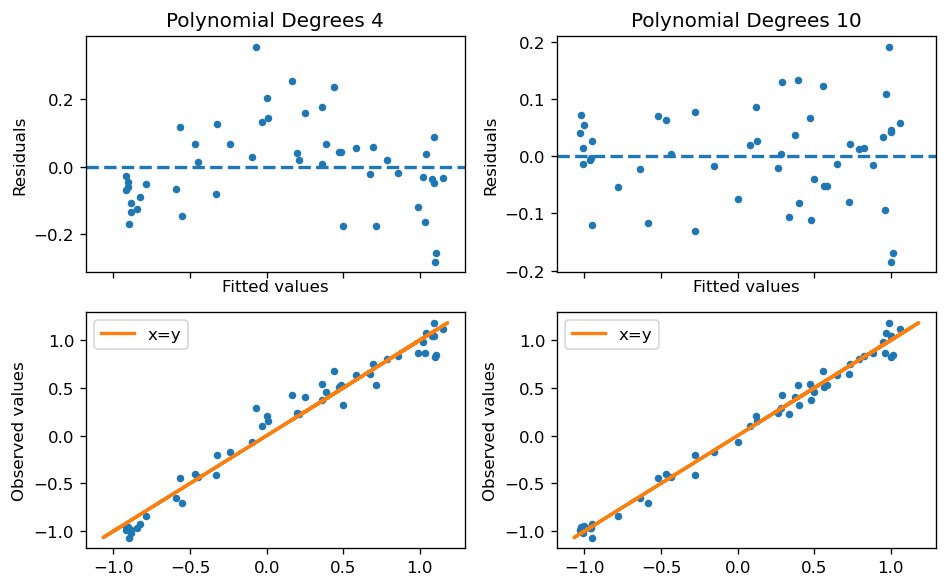

In [32]:
residuals1 = y - poly_pred(x, x_vals, degree1)[1]
residuals2 = y - poly_pred(x, x_vals, degree2)[1]

fits1 = poly_pred(x, x_vals, degree1)[1]
fits2 = poly_pred(x, x_vals, degree2)[1]

f, (ax1, ax2) = plt.subplots(2, 2, sharex = True)
ax1[0].plot(fits1, residuals1,'.')
ax1[0].set_ylabel("Residuals")
ax1[0].set_xlabel("Fitted values")
ax1[0].axhline(y=0, ls='--')
ax1[0].set_title("Polynomial Degrees %d" % (degree1))

ax1[1].plot(fits2, residuals2,'.')
ax1[1].set_ylabel("Residuals")
ax1[1].set_xlabel("Fitted values")
ax1[1].axhline(y=0, ls='--')
ax1[1].set_title("Polynomial Degrees %d" % (degree2))

ax2[0].plot(fits1, y,'.')
ax2[0].plot(y, y,'-',label='x=y')
ax2[0].set_ylabel("Observed values")
ax2[0].legend()

ax2[1].plot(fits2, y,'.')
ax2[1].plot(y, y,'-',label='x=y')
ax2[1].set_ylabel("Observed values")
ax2[1].legend()

plt.tight_layout()

---
#### Exercise 

Based on the above figures does either model appear reasonable? Justify your answers. 

---

## Example 3
[Note that this is a fictional example with fictional data.]
The Scottish government decided to introduce bears back into the wildlife in the Highlands. To monitor how this affects other species, they asked some ecologists to monitor how many deer ($y$) they saw in the Highlands in year $x$. The government is very protective of their data and asks you to conduct a regression analysis with $n=20$ data points.

In the remaining exercises of this workshop you may, whenever necessary, calculate the RMSE using the function `calc_RMSE(obs,fit)` which is defined in the setup file. It requires the observed values $y$ and the fitted values $\hat y$ as arguments. 

---

#### Exercise 
Load the  $n\times1$ dimensional data matrix of this example using `np.load('rm2_ex3a_x.npy')` and the vector with the dependent variables using `np.load('rm2_ex3a_y.npy')`. Plot the data, and fit a suitable regression model using Ordinary Least Squares.  

Compute the RMSE.

(20,)


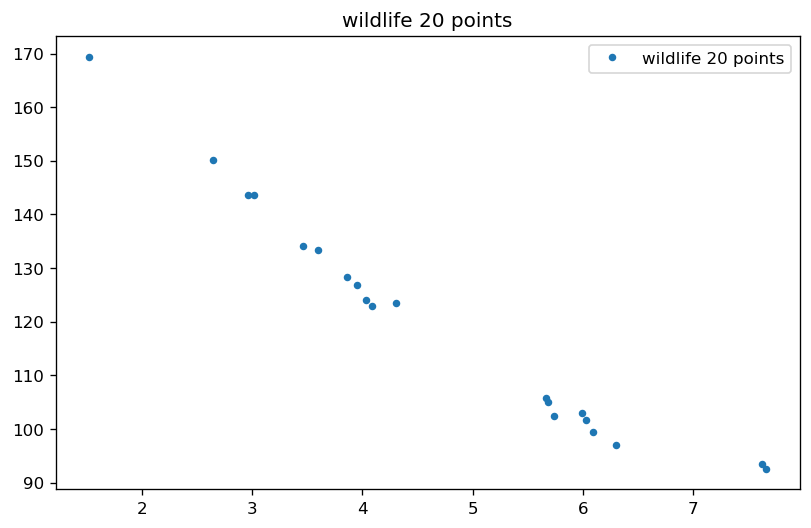

In [95]:
x3 = np.load('rm2_ex3a_x.npy')
y3 = np.load('rm2_ex3a_y.npy')
print(x3.shape)
plt.title('wildlife 20 points')
plt.plot(x3, y3, '.', label = 'wildlife 20 points')
plt.legend()
plt.show() 

### Exercise
Predict the expected number of deers after $12$ years. How would you interpret this? Would you be confident that this is an accurate prediction?

After 12 years we expect [28.9831677] deers.


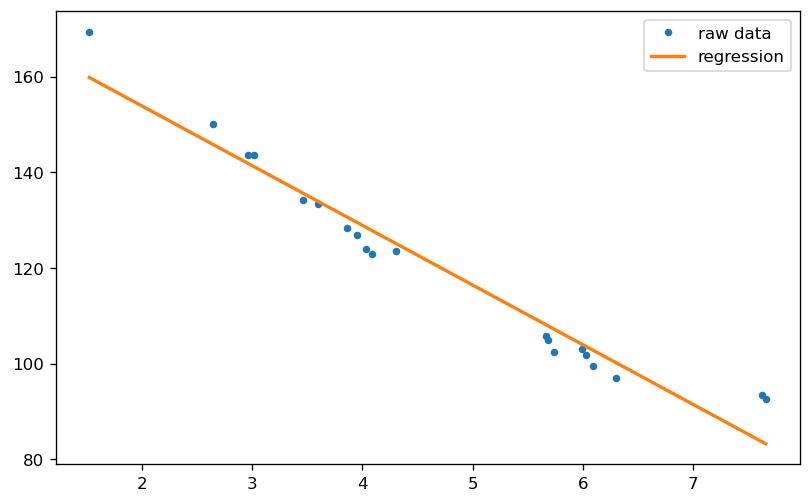

In [96]:
x_val = 12
# using linear regression
X3 = np.c_[np.ones(20), x3]
reg = linear_reg.fit(X3, y3)
X12 = np.c_[1,[x_val]]
y_predicted = reg.predict(X12)   # INSERT CODE
print('After 12 years we expect '+str(y_predicted)+' deers.') 
x_vals = np.linspace(min(x3), max(x3), num=200) # Construct prediction location data
X_vals = np.c_[np.ones(x_vals.shape[0]), x_vals]
y_hat = reg.predict(X_vals)
plt.plot(x3, y3, '.', label = 'raw data')
plt.plot(x_vals, y_hat, '-', label = 'regression')
plt.legend()
plt.show() 

The government realises that maybe they should give you all the $n=1000$ data points they collected in order to fit a better regression model.
### Exercise
Load the full data set using `np.load('rm2_ex3b_x.npy')` and the vector with the independent variables using `np.load('rm2_ex3b_y.npy')`. Plot the new data and the regression function you obtained previously. 

(1000,)


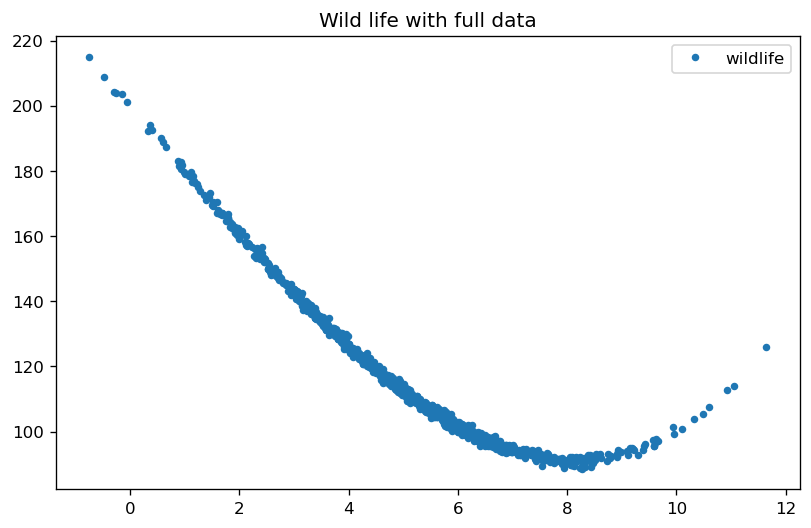

In [97]:
x3b = np.load('rm2_ex3b_x.npy')
y3b = np.load('rm2_ex3b_y.npy')
print(x3b.shape)
plt.plot(x3b, y3b, '.', label = 'wildlife')
plt.title("Wild life with full data")
plt.legend()
plt.show() 

Using the same model as before, fit a new regression function. Does this do a better job at explaining the data? 
Using the estimate $\hat\beta_{old}$ from the previous cells and the new estimate $\hat\beta_{new}$ obtained fitting the full data set, calculate the corresponding fitted values $\hat y_{old}$ and $\hat y_{new}$ by predicting the response at the $1000$ data points. How do the RMSEs (calculated using these estimates) compare to one another?

After 12 years we expect [42.73115328] deers.


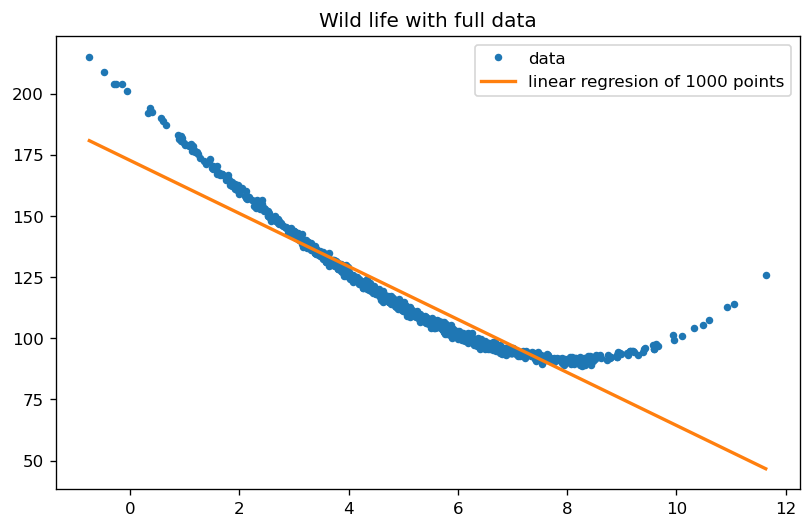

In [98]:
X3b = np.c_[np.ones(1000), x3b]
reg = linear_reg.fit(X3b, y3b)
X12 = np.c_[1,[x_val]]
y_predicted = reg.predict(X12)   # INSERT CODE
print('After 12 years we expect '+str(y_predicted)+' deers.') 
plt.plot(x3b, y3b, '.', label = 'data')
x_vals = np.linspace(min(x3b), max(x3b), num=200) # Construct prediction location data
X_vals = np.c_[np.ones(x_vals.shape[0]), x_vals]
y_predicted = reg.predict(X_vals) 
plt.plot(x_vals, y_predicted, '-', label = 'linear regresion of 1000 points' )
plt.title("Wild life with full data")
plt.legend()
plt.show() 

### Exercise
Fit three polynomial models, using $2$, $3$, and $4$ degrees, respectively. Plot the three regression lines in a plot, including an appropriate legend and axis labels. Compute the RMSE for each model. Which model is the best compromise between improving the regression and keeping the model as simple as possible?

In [ ]:
# INSERT CODE

''' Recall that you can calculate the RMSE using the function defined earlier as follows: '''
# rmse_one_model = calc_RMSE(y,y_fitted_by_one_model)


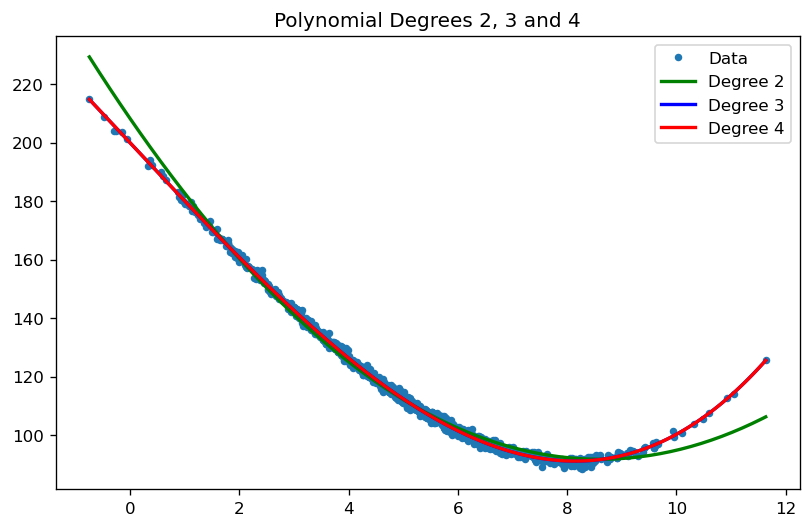

In [69]:
degree1 = 2 # Insert choice
degree2 = 3 # Insert choice
degree3 = 4 # Insert choice

x_vals = np.linspace(min(x3b), max(x3b), num=200) # Construct prediction location data
      
# Plot the data and regression line
plt.plot(x3b, y3b, ".", label="Data")    
plt.plot(x_vals, poly_pred(x3b, y3b, x_vals, degree1)[0], "g-", label="Degree %d" % (degree1))
plt.plot(x_vals, poly_pred(x3b, y3b, x_vals, degree2)[0], "b-", label="Degree %d" % (degree2))
plt.plot(x_vals, poly_pred(x3b, y3b, x_vals, degree3)[0], "r-", label="Degree %d" % (degree3))

plt.title("Polynomial Degrees %d, %d and %d" % (degree1, degree2, degree3))
plt.legend()
plt.show() 

### Exercise
Predict the expected number of deers after $12$ years using your preferred model of choice. How does this compare to the previous prediction? Would you be confident that this is an accurate prediction?

In [71]:
x_val = 12 
y_predicted =  poly_pred(x3b, y3b, x_val, 1)[0] # INSERT CODE for the prediction of the linear model 
y_predicted2 = poly_pred(x3b, y3b, x_val, 2)[0] # INSERT CODE for the prediction of the quadratic model 
y_predicted3 = poly_pred(x3b, y3b, x_val, 3)[0] # INSERT CODE for the prediction of the cubic model 
y_predicted4 = poly_pred(x3b, y3b, x_val, 4)[0] # INSERT CODE for the prediction of the fourth-degree model 

print('According to the 1 degree model, after 12 years we expect '+str(y_predicted)+' deers.') 
print('According to the 2 degree model, after 12 years we expect '+str(y_predicted2)+' deers.') 
print('According to the 3 degree model, after 12 years we expect '+str(y_predicted3)+' deers.') 
print('According to the 4 degree model, after 12 years we expect '+str(y_predicted4)+' deers.') 

'''
i dont have confident with this. with those models, years increasing the amount of 
deers will also keep increasing. but in reality it is not possible!  
'''

According to the 1 degree model, after 12 years we expect [42.73115328] deers.
According to the 2 degree model, after 12 years we expect [109.99332188] deers.
According to the 3 degree model, after 12 years we expect [133.6615057] deers.
According to the 4 degree model, after 12 years we expect [133.68154891] deers.
